<h1>Iris Flower Classification with Logistic Regression</h1>
<p>In this notebook, I will classify an Iris flower into three classes known as :-</p>
<ul>
    <li><i>Iris-setosa</i></li>
    <li><i>Iris-virginica</i></li>
    <li><i>Iris-versicolor</i></li>
</ul>
<p>I will classify them based on the following features :-</p>
<ul>
    <li>Sepal Length (in cm)</li>
    <li>Sepal Width (in cm)</li>
    <li>Petal Length (in cm)</li>
    <li>Petal Width (in cm)</li>
</ul>
<p>For simplicity, I will classify an Iris flower into <i>Iris-setosa</i> and <i>Iris-versicolor</i> based on their Sepal Length and Sepal Width i.e <b>Binary Classification</b></p>

<h3>Importing packages</h3>
<p>To build our own classifier, we require the following packages</p>
<ul>
    <li>NumPy, for vectorized calculations</li>
    <li>Pandas for reading the dataset</li>
    <li>Matplotlib, for data visualization</li>
    <li>Scipy's fmin_tnc function, for our optimization algorithm</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc

<h3>Fetching the dataset</h3>
<p>We will fetch the Iris dataset, found from Kaggle, using the Pandas's read_csv function and store the resultant DataFrame into a variable, and print the first five entries</p>
<p>We see that there are in total six columns as follows :-</p>
<ol>
    <li>Id (dropped as it is of no use)</li>
    <li>SepalLengthCm : The length of the sepal (in cm)</li>
    <li>SepalWidthCm : The width of the sepal (in cm)</li>
    <li>PetalLengthCm : The length of the petal (in cm)</li>
    <li>PetalWidthCm : The width of the petal (in cm)</li>
</ol>

In [2]:
dataset = pd.read_csv('Iris.csv').drop(['Id'], axis=1)
print(dataset.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<h3>Dividing the dataset based on the classes</h3>
<p>From the dataset, we know that there are three values of flower species. So, we separate the data of the three types of Iris flowers and moreover, we again separate them based on sepal and petal measurements</p>

In [3]:
iris_setosa = dataset[dataset['Species'] == 'Iris-setosa']
iris_virginica = dataset[dataset['Species'] == 'Iris-virginica']
iris_versicolor = dataset[dataset['Species'] == 'Iris-versicolor']

sepal_iris_setosa = iris_setosa.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
petal_iris_setosa = iris_setosa.drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)

sepal_iris_virginica = iris_virginica.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
petal_iris_virginica = iris_virginica.drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)

sepal_iris_versicolor = iris_versicolor.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
petal_iris_versicolor = iris_versicolor.drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)

<h3>Visualizing whether a flower is Iris Setosa or Iris Versicolor</h3>
<p>We make a scatter plot between sepal length and sepal width of the Iris-setosa flowers and Iris-versicolor flowers. As shown, we see that we can make a linear decision boundary that can be used to classify these flowers</p>

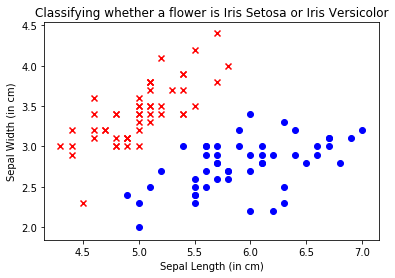

In [4]:
plt.scatter(sepal_iris_setosa['SepalLengthCm'].values, sepal_iris_setosa['SepalWidthCm'].values, color="red", marker="x")
plt.scatter(sepal_iris_versicolor['SepalLengthCm'].values, sepal_iris_versicolor['SepalWidthCm'].values, color="blue", marker="o")
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.title('Classifying whether a flower is Iris Setosa or Iris Versicolor')
plt.show()

<h3>Feature Extraction</h3>
<p>To correctly classify the flowers, we only need to extract the 'SepalLengthCm' and 'SepalWidthCm' features from the dataset. First of all, we choose the mentioned features and store it in 'features' variable and then, choose the 'Species' column from the dataset and store it in the 'labels' variable</p>
<p>Secondly, we need to add ones to the feature index number 0 for all training samples as this allows us to do matrix operations with theta and x, making the two vectors 'theta' and 'x(i)' match each other element-wise i.e have the same number of elements.</p>
<p>Finally, we also need to assign numeric values for our labels and not string values. So, we replace all the values that are equal to 'Iris-setosa' by 1 and others by 0. In this way, it becomes easy to calcuate the cost, error and optimized the theta parameters</p>

In [5]:
data = dataset[dataset['Species'] != 'Iris-virginica'].drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
features = data.drop(['Species'], axis=1)
labels = data['Species'].values
features.insert(0, 'ones', np.ones(features.shape[0]))
features = features.values
labels = np.where(labels == 'Iris-setosa', 1, 0)
print(features.shape)
print(labels.shape)

(100, 3)
(100,)


<h3>Coding the logistic regression model</h3>
<p>For logistic regression, we change our hypothesis function to a Logistic / Sigmoid function as shown by the following formula :</p>
<img src="https://lh6.googleusercontent.com/YLj7urDpb3LubdUz_Jq2xl-Lm5KVPvVZPvYo078tPK-XreLBqImRcKTtOvbbqH_CQ0dlw2VcN4fTwLiNdPbvfBLwmV8i4VOhJoH39pG3nZ45uVRGJhhlUPiJthADjOediA" />
<p>The logistic function restricts the output values to be in the range of 0 and 1</p>
<p>The intuition of using the logistic function is that it will give us the probability that our output is 1. E.g : h(x) = 0.7 implies that there is 70% chance that our output is 1.</p>
<p>The cost function in logistic regression is as follows :-</p>
<img src="https://lh6.googleusercontent.com/HlkwfGp9LKyF0ff5DUJKRgwUjp-wh1nIkTA2hLLupIQDEe_A8MCdizCBxN5kepa4zBnv6ckp44ZUlkK2c1tms-GgB5fCBDY1Or8OeNWM3CJZnHER1G7pKu5xmCHmAmcV7w" />
<p>Notice that when y is equal to 1, then the second term will be zero and will not affect the result. If y is equal to 0, then the first term will be zero and will not affect the result. For incorrect outputs, the cost function gets penalized heavily.</p>
<p>We also use gradient descent as our optimization algorithm. Gradient descent provides us the optimized values of theta that best divides the given data. It looks as follows :</p>
<img src="https://cdn-images-1.medium.com/max/1600/0*8yzvd7QZLn5T1XWg.jpg" />
<p>In above, we make a separate function for calculating only the gradient (second term in above formula)</p>
<p>Now, we need to optimize the theta values as fast as possible. To do that from scratch is difficult. Instead, we borrow that functionality from Scipy library. This library contains various advance optimization algorithms under the 'optimize' submodule.</p>
<p>We will be using the 'fmin_tnc() function which takes the following parameters :</p>
<ol>
    <li>func : The name of the user-defined cost function (in our case, cost)</li>
    <li>x0 : Initial values of theta</li>
    <li>fprime : The name of the user-defined gradient function (in our case, gradient)</li>
    <li>args : The tuple consisting of features (x) and labels (y)</li>
</ol>
<p>This function returns the optimized values of theta in it's first element.</p>

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

def cost(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def fit(x,y):
    theta = np.ones(x.shape[1])
    theta = fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x,y))
    return theta[0]

theta = fit(features, labels)
print(theta)

[ 26.37857529 -11.60431002  11.61981372]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


<h3>Visualizing the decision boundary</h3>
<p>As there are two features, the linear equation can be represented by :</p>
<img src="https://cdn-images-1.medium.com/max/1600/1*p4JFHHlPo5PVZYc3uUhpAg.png" />
<p>The decision boundary can be found by setting the weighted sum of inputs to 0. Equating h(x) to 0, gives us :</p>
<img src="https://cdn-images-1.medium.com/max/1600/1*oTv8jjq4-ojOEzilU3oSfg.png" />
<p>We will plot our descision boundary on top of the scatter plot we already made previously</p>

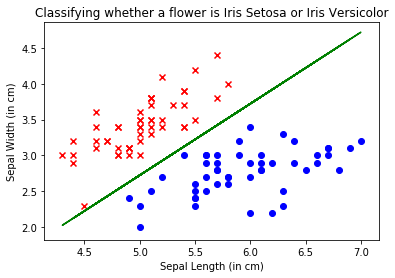

In [7]:
x_vals = features[:,1]
pred_y_vals = -(theta[0] + np.dot(x_vals, theta[1])) / theta[2]

plt.plot(x_vals, pred_y_vals, color="green")

plt.scatter(sepal_iris_setosa['SepalLengthCm'].values, sepal_iris_setosa['SepalWidthCm'].values, color="red", marker="x")
plt.scatter(sepal_iris_versicolor['SepalLengthCm'].values, sepal_iris_versicolor['SepalWidthCm'].values, color="blue", marker="o")
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.title('Classifying whether a flower is Iris Setosa or Iris Versicolor')
plt.show()